In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import sys
#sys.path.append("/ahg/regevdata/projects/Cell2CellCommunication/code/MIMOSCA")
import perturbseq as perturb

%matplotlib inline
import matplotlib.pyplot as plt


sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, color_map='viridis',figsize=(8,5))
sc.logging.print_versions()
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

The `sinfo` package has changed name and is now called `session_info` to become more discoverable and self-explanatory. The `sinfo` PyPI package will be kept around to avoid breaking old installs and you can downgrade to 0.3.2 if you want to use it without seeing this message. For the latest features and bug fixes, please install `session_info` instead. The usage and defaults also changed slightly, so please review the latest README at https://gitlab.com/joelostblom/session_info.
-----
anndata     0.7.6
scanpy      1.7.2
sinfo       0.3.4
-----
PIL                 8.2.0
anyio               NA
appnope             0.1.2
attr                20.3.0
babel               2.9.0
backcall            0.2.0
bottleneck          1.3.2
brotli              NA
cairo               1.20.1
certifi             2020.12.05
cffi                1.14.5
chardet             4.0.0
cloudpickle         1.6.0
colorama            0.4.4
cycler              0.10.0
cython_runtime      NA
cytoolz             0.11.0
dask  

In [2]:
#sc._settings.ScanpyConfig.figdir="/Users/ursuo/Documents/research/baf/data/2022-03-27/Figures/"


In [3]:
f="/Users/ursuo/Documents/research/baf/data/2022-03-27/combo2/combo_alex_forumap.h5ad"
adata=sc.read(f)
adata

AnnData object with n_obs × n_vars = 5943 × 12671
    obs: 'batch', 'SMARCC1_7', 'GLTSCR1_1', 'BCL7B_1', 'SMARCD1_4', 'DPF2_4', 'BRD9_2', 'BCL7C_2', 'SS18_2', 'GLTSCR1L_3', 'PHF10_1', 'NTC7_IG1144056', 'ARID2_1', 'SMARCD2_3', 'SMARCA2_4', 'ARID1B_4', 'BCL7A_3', 'SMARCC2_3', 'SMARCE1_1', 'NTC1_IG345439', 'SMARCB1_5', 'BRD7_2', 'SMARCA4_4', 'NTC6_IG1216445', 'SS18L_1', 'PBRM1_3', 'ARID1A_3', 'gene.cell', 'gene.BCL7A', 'gene.ARID2', 'gene.ARID1A', 'gene.PHF10', 'gene.GLTSCR1L', 'gene.SS18', 'gene.DPF2', 'gene.SMARCA4', 'gene.BCL7B', 'gene.SMARCC2', 'gene.SS18L', 'gene.SMARCA2', 'gene.SMARCD2', 'gene.SMARCB1', 'gene.GLTSCR1', 'gene.NTC', 'gene.SMARCD1', 'gene.ARID1B', 'gene.BRD9', 'gene.BRD7', 'gene.SMARCE1', 'gene.PBRM1', 'gene.SMARCC1', 'gene.BCL7C', 'guide', 'guide.compact', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '1', '2', '0', 'louvain', 'condition', 'condition.compact', 'dataset', 'cell_cycle_phase'
    var: 'n_cells', 'mt', 'n_cells_by_cou

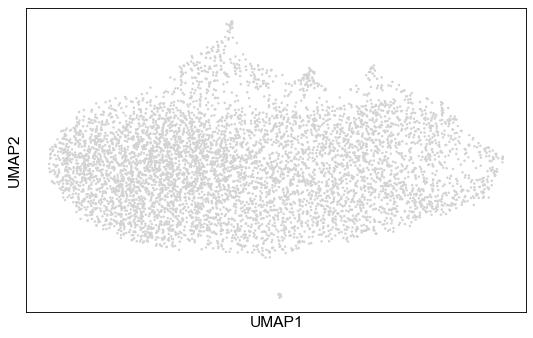

In [4]:
sc.pl.umap(adata)

In [13]:
adata.obs['condition'].value_counts()

ARID1B                   595
NTC                      549
ARID2                    409
SS18                     396
DPF2                     347
ARID1A,ARID1B            262
BRD9                     245
GLTSCR1                  237
GLTSCR1L,GLTSCR1         175
ARID1A                   174
ARID2,BRD9               161
PBRM1                    159
SMARCA2,SMARCA4          156
SMARCC1,SMARCC2          150
SMARCE1                  141
GLTSCR1L                 136
SMARCC2                  136
SMARCA2                  128
SMARCB1                  113
SMARCD1                  111
ARID2,SMARCB1            109
SMARCA4                  108
ARID2,SMARCE1             99
SMARCD1,SMARCD2           87
SS18L                     83
ARID1A,ARID1B,BRD9        66
PHF10                     61
BCL7C                     60
SMARCC1                   57
BCL7A                     56
SMARCD2                   56
ARID1A,ARID1B,ARID2       47
BRD9,GLTSCR1L,GLTSCR1     45
BCL7B                     41
SS18L,SS18    

/Users/ursuo/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
... storing 'embedARID1B' as categorical
computing density on 'umap'
--> added
    'umap_density_embedARID1B', densities (adata.obs)
    'umap_density_embedARID1B_params', parameter (adata.uns)
/Users/ursuo/anaconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/__init__.py:1186: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("YlOrRd"))
  color_map.set_over('black')
/Users/ursuo/anaconda3/lib/python3

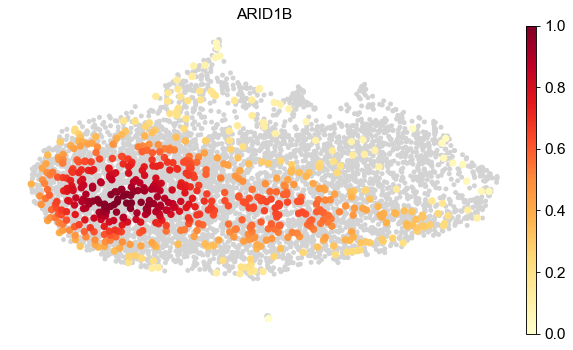

In [5]:
def plot_embedding_one(adata_here,gene):
    x=100
    adata_here.obs['embed'+gene]='not'
    adata_here.obs['embed'+gene].loc[adata_here.obs['condition']==gene]=gene
    sc.tl.embedding_density(adata_here, basis='umap', groupby='embed'+gene)
    sc.pl.embedding_density(
    adata_here, basis='umap', key='umap_density_embed'+gene, group=gene,
    #fg_dotsize=x,
    #bg_dotsize=x,
    save=gene+'.pdf',vmin=0,vmax=1,
        frameon=False,
        
)

plot_embedding_one(adata,'ARID1B')

... storing 'embedSMARCC1' as categorical
computing density on 'umap'
--> added
    'umap_density_embedSMARCC1', densities (adata.obs)
    'umap_density_embedSMARCC1_params', parameter (adata.uns)


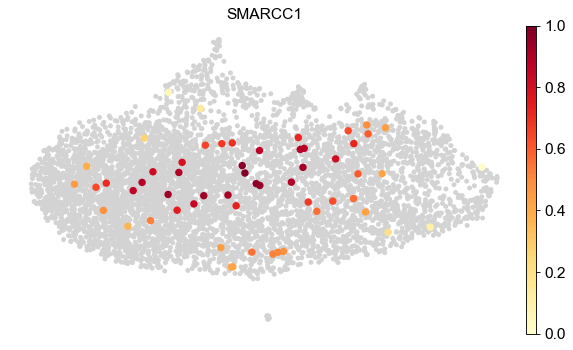

In [7]:
plot_embedding_one(adata,'SMARCC1')

... storing 'embedSMARCC2' as categorical
computing density on 'umap'
--> added
    'umap_density_embedSMARCC2', densities (adata.obs)
    'umap_density_embedSMARCC2_params', parameter (adata.uns)


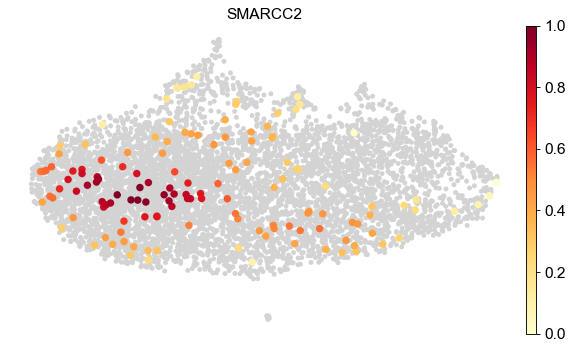

In [8]:
plot_embedding_one(adata,'SMARCC2')

... storing 'embedSMARCC1,SMARCC2' as categorical
computing density on 'umap'
--> added
    'umap_density_embedSMARCC1,SMARCC2', densities (adata.obs)
    'umap_density_embedSMARCC1,SMARCC2_params', parameter (adata.uns)


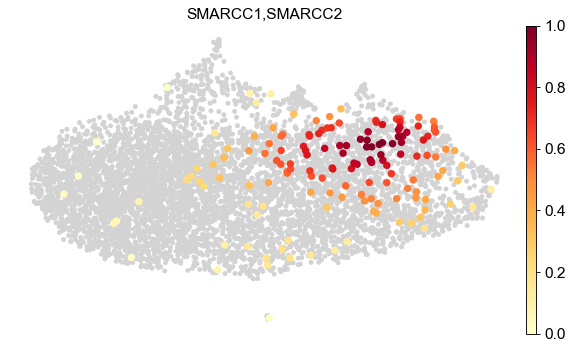

In [9]:
plot_embedding_one(adata,'SMARCC1,SMARCC2')

In [11]:
adata

AnnData object with n_obs × n_vars = 5943 × 12671
    obs: 'batch', 'SMARCC1_7', 'GLTSCR1_1', 'BCL7B_1', 'SMARCD1_4', 'DPF2_4', 'BRD9_2', 'BCL7C_2', 'SS18_2', 'GLTSCR1L_3', 'PHF10_1', 'NTC7_IG1144056', 'ARID2_1', 'SMARCD2_3', 'SMARCA2_4', 'ARID1B_4', 'BCL7A_3', 'SMARCC2_3', 'SMARCE1_1', 'NTC1_IG345439', 'SMARCB1_5', 'BRD7_2', 'SMARCA4_4', 'NTC6_IG1216445', 'SS18L_1', 'PBRM1_3', 'ARID1A_3', 'gene.cell', 'gene.BCL7A', 'gene.ARID2', 'gene.ARID1A', 'gene.PHF10', 'gene.GLTSCR1L', 'gene.SS18', 'gene.DPF2', 'gene.SMARCA4', 'gene.BCL7B', 'gene.SMARCC2', 'gene.SS18L', 'gene.SMARCA2', 'gene.SMARCD2', 'gene.SMARCB1', 'gene.GLTSCR1', 'gene.NTC', 'gene.SMARCD1', 'gene.ARID1B', 'gene.BRD9', 'gene.BRD7', 'gene.SMARCE1', 'gene.PBRM1', 'gene.SMARCC1', 'gene.BCL7C', 'guide', 'guide.compact', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '1', '2', '0', 'louvain', 'condition', 'condition.compact', 'dataset', 'cell_cycle_phase', 'embedARID1B', 'umap_density_embedARID1B

... storing 'embedGLTSCR1' as categorical
computing density on 'umap'
--> added
    'umap_density_embedGLTSCR1', densities (adata.obs)
    'umap_density_embedGLTSCR1_params', parameter (adata.uns)


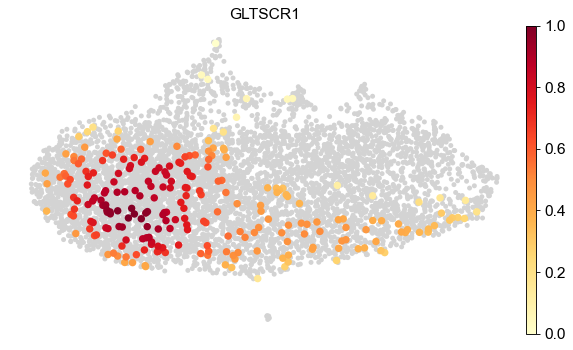

... storing 'embedGLTSCR1L' as categorical
computing density on 'umap'
--> added
    'umap_density_embedGLTSCR1L', densities (adata.obs)
    'umap_density_embedGLTSCR1L_params', parameter (adata.uns)


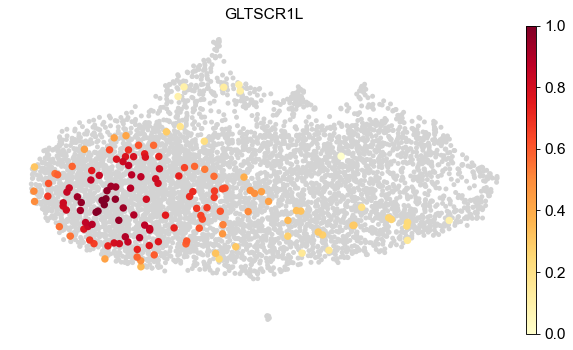

... storing 'embedGLTSCR1L,GLTSCR1' as categorical
computing density on 'umap'
--> added
    'umap_density_embedGLTSCR1L,GLTSCR1', densities (adata.obs)
    'umap_density_embedGLTSCR1L,GLTSCR1_params', parameter (adata.uns)


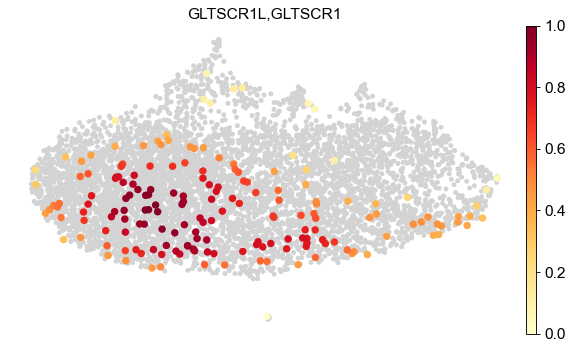

In [14]:
plot_embedding_one(adata,'GLTSCR1')
plot_embedding_one(adata,'GLTSCR1L')
plot_embedding_one(adata,'GLTSCR1L,GLTSCR1')

... storing 'embedARID1A' as categorical
computing density on 'umap'
--> added
    'umap_density_embedARID1A', densities (adata.obs)
    'umap_density_embedARID1A_params', parameter (adata.uns)


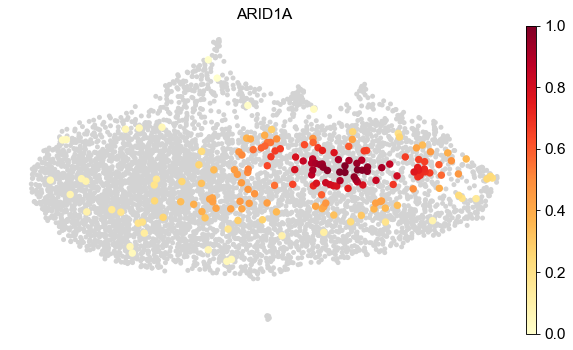

In [6]:
plot_embedding_one(adata,'ARID1A')

... storing 'embedARID1A,ARID1B' as categorical
computing density on 'umap'
--> added
    'umap_density_embedARID1A,ARID1B', densities (adata.obs)
    'umap_density_embedARID1A,ARID1B_params', parameter (adata.uns)


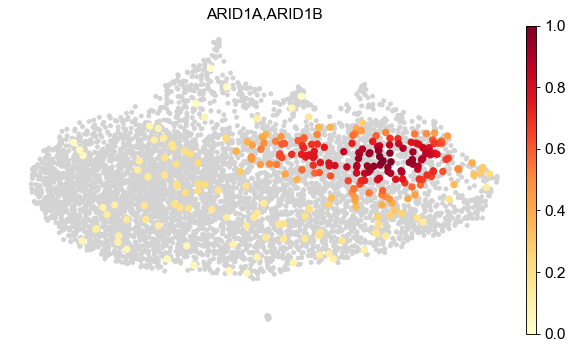

... storing 'embedBRD9' as categorical
computing density on 'umap'
--> added
    'umap_density_embedBRD9', densities (adata.obs)
    'umap_density_embedBRD9_params', parameter (adata.uns)


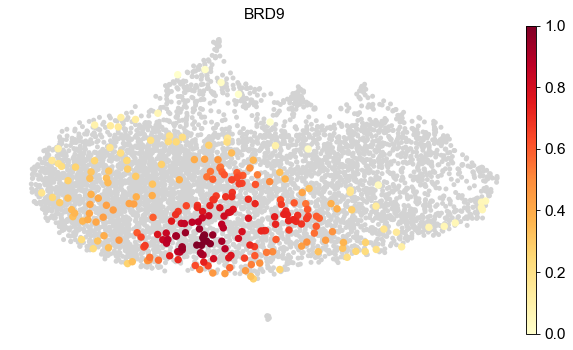

... storing 'embedARID1A,ARID1B,BRD9' as categorical
computing density on 'umap'
--> added
    'umap_density_embedARID1A,ARID1B,BRD9', densities (adata.obs)
    'umap_density_embedARID1A,ARID1B,BRD9_params', parameter (adata.uns)


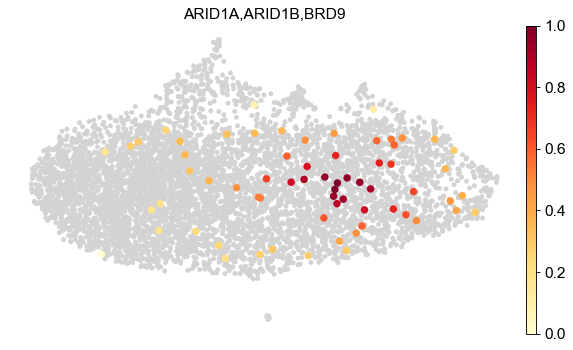

In [46]:
plot_embedding_one(adata,'ARID1A,ARID1B')
plot_embedding_one(adata,'BRD9')
plot_embedding_one(adata,'ARID1A,ARID1B,BRD9')

... storing 'embedDPF2' as categorical
computing density on 'umap'
--> added
    'umap_density_embedDPF2', densities (adata.obs)
    'umap_density_embedDPF2_params', parameter (adata.uns)


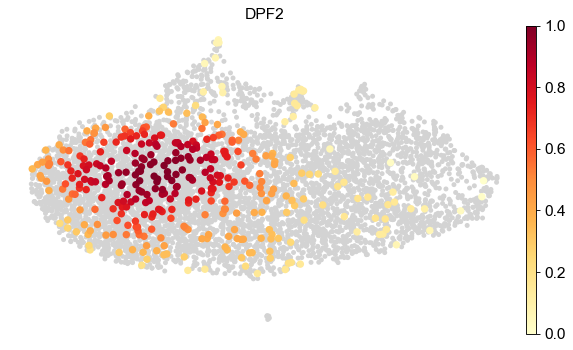

... storing 'embedARID1A,ARID1B,DPF2' as categorical
computing density on 'umap'
--> added
    'umap_density_embedARID1A,ARID1B,DPF2', densities (adata.obs)
    'umap_density_embedARID1A,ARID1B,DPF2_params', parameter (adata.uns)


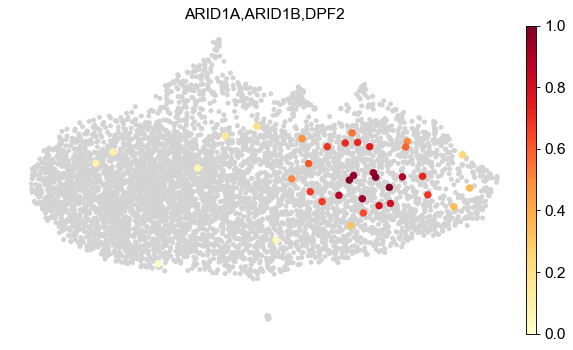

In [47]:
plot_embedding_one(adata,'DPF2')
plot_embedding_one(adata,'ARID1A,ARID1B,DPF2')

... storing 'embedARID2' as categorical
computing density on 'umap'
--> added
    'umap_density_embedARID2', densities (adata.obs)
    'umap_density_embedARID2_params', parameter (adata.uns)


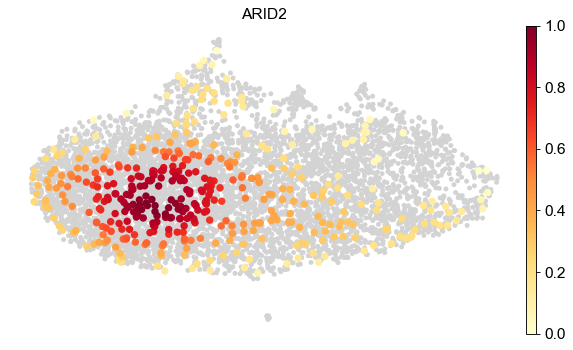

... storing 'embedARID1A,ARID1B,ARID2' as categorical
computing density on 'umap'
--> added
    'umap_density_embedARID1A,ARID1B,ARID2', densities (adata.obs)
    'umap_density_embedARID1A,ARID1B,ARID2_params', parameter (adata.uns)


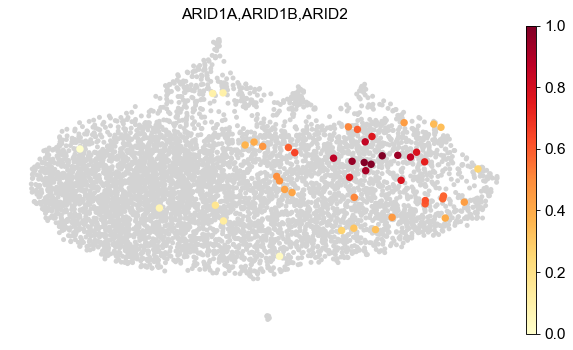

In [48]:
plot_embedding_one(adata,'ARID2')
plot_embedding_one(adata,'ARID1A,ARID1B,ARID2')

... storing 'embedBRD9' as categorical
computing density on 'umap'
--> added
    'umap_density_embedBRD9', densities (adata.obs)
    'umap_density_embedBRD9_params', parameter (adata.uns)


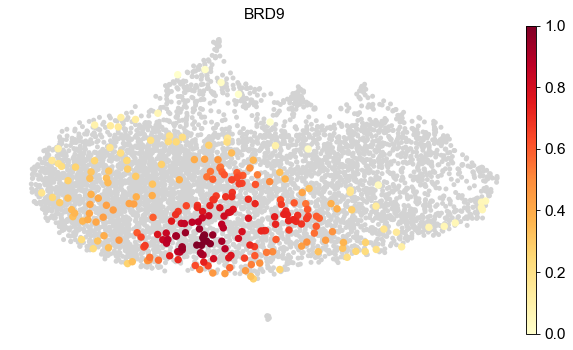

... storing 'embedARID2,BRD9' as categorical
computing density on 'umap'
--> added
    'umap_density_embedARID2,BRD9', densities (adata.obs)
    'umap_density_embedARID2,BRD9_params', parameter (adata.uns)


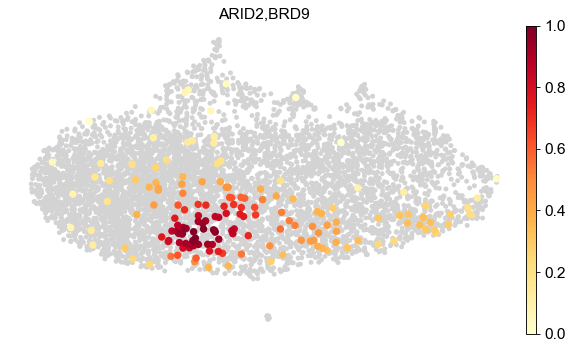

In [49]:
plot_embedding_one(adata,'BRD9')
plot_embedding_one(adata,'ARID2,BRD9')

... storing 'embedSMARCA2' as categorical
computing density on 'umap'
--> added
    'umap_density_embedSMARCA2', densities (adata.obs)
    'umap_density_embedSMARCA2_params', parameter (adata.uns)


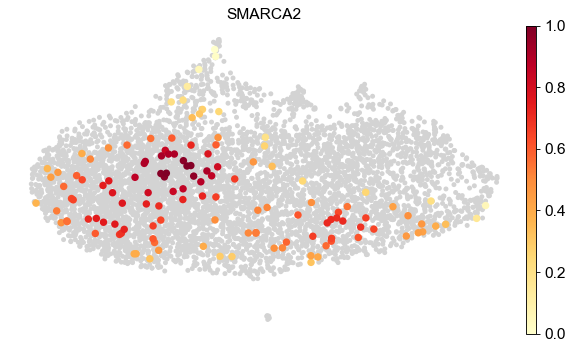

... storing 'embedSMARCA4' as categorical
computing density on 'umap'
--> added
    'umap_density_embedSMARCA4', densities (adata.obs)
    'umap_density_embedSMARCA4_params', parameter (adata.uns)


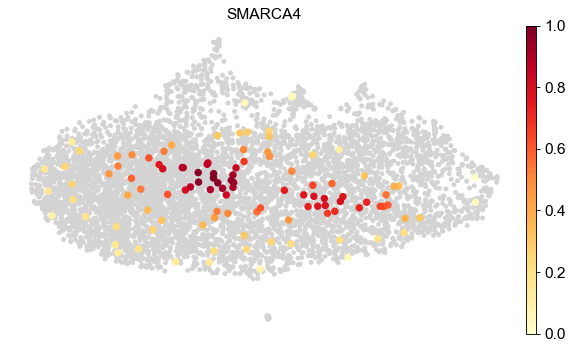

... storing 'embedSMARCA2,SMARCA4' as categorical
computing density on 'umap'
--> added
    'umap_density_embedSMARCA2,SMARCA4', densities (adata.obs)
    'umap_density_embedSMARCA2,SMARCA4_params', parameter (adata.uns)


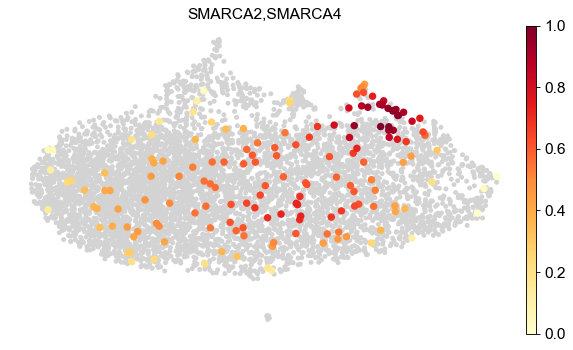

In [62]:
plot_embedding_one(adata,'SMARCA2')
plot_embedding_one(adata,'SMARCA4')
plot_embedding_one(adata,'SMARCA2,SMARCA4')

... storing 'embedSMARCD1' as categorical
computing density on 'umap'
--> added
    'umap_density_embedSMARCD1', densities (adata.obs)
    'umap_density_embedSMARCD1_params', parameter (adata.uns)


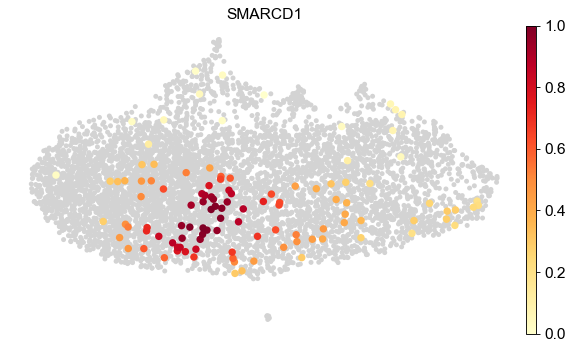

... storing 'embedSMARCD2' as categorical
computing density on 'umap'
--> added
    'umap_density_embedSMARCD2', densities (adata.obs)
    'umap_density_embedSMARCD2_params', parameter (adata.uns)


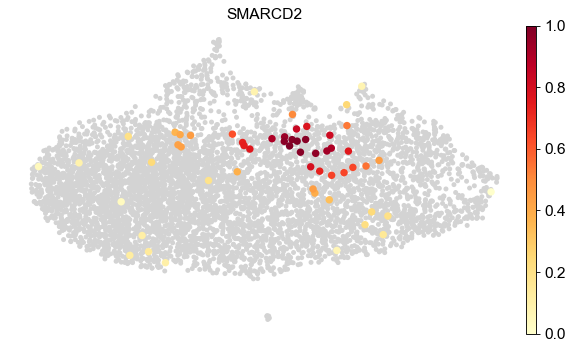

... storing 'embedSMARCD1,SMARCD2' as categorical
computing density on 'umap'
--> added
    'umap_density_embedSMARCD1,SMARCD2', densities (adata.obs)
    'umap_density_embedSMARCD1,SMARCD2_params', parameter (adata.uns)


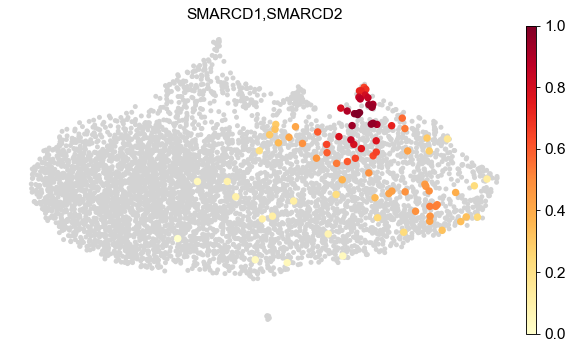

In [63]:
plot_embedding_one(adata,'SMARCD1')
plot_embedding_one(adata,'SMARCD2')
plot_embedding_one(adata,'SMARCD1,SMARCD2')

... storing 'embedSS18' as categorical
computing density on 'umap'
--> added
    'umap_density_embedSS18', densities (adata.obs)
    'umap_density_embedSS18_params', parameter (adata.uns)


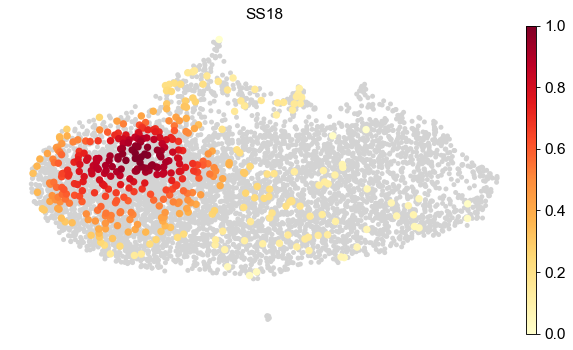

... storing 'embedSS18L' as categorical
computing density on 'umap'
--> added
    'umap_density_embedSS18L', densities (adata.obs)
    'umap_density_embedSS18L_params', parameter (adata.uns)


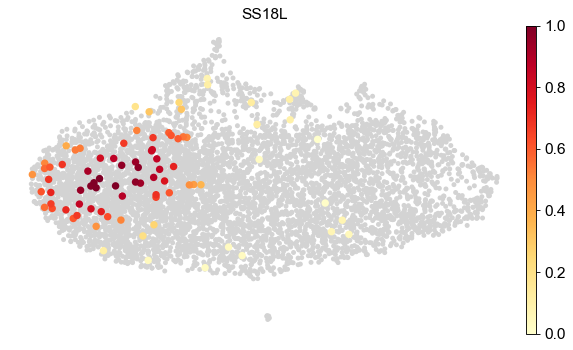

... storing 'embedSS18L,SS18' as categorical
computing density on 'umap'
--> added
    'umap_density_embedSS18L,SS18', densities (adata.obs)
    'umap_density_embedSS18L,SS18_params', parameter (adata.uns)


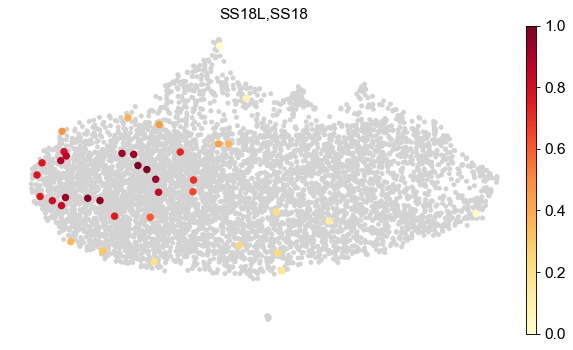

In [66]:
plot_embedding_one(adata,'SS18')
plot_embedding_one(adata,'SS18L')
plot_embedding_one(adata,'SS18L,SS18')

... storing 'embedDPF2' as categorical
computing density on 'umap'
--> added
    'umap_density_embedDPF2', densities (adata.obs)
    'umap_density_embedDPF2_params', parameter (adata.uns)


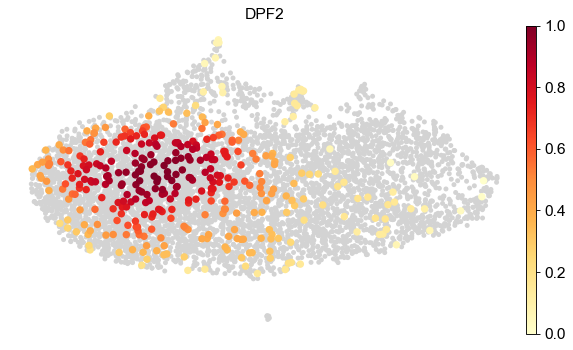

... storing 'embedPHF10' as categorical
computing density on 'umap'
--> added
    'umap_density_embedPHF10', densities (adata.obs)
    'umap_density_embedPHF10_params', parameter (adata.uns)


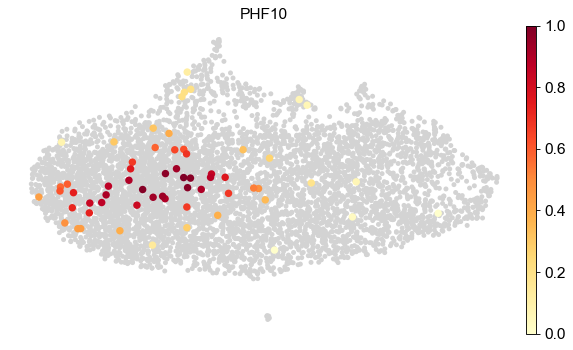

... storing 'embedDPF2,PHF10' as categorical
computing density on 'umap'
--> added
    'umap_density_embedDPF2,PHF10', densities (adata.obs)
    'umap_density_embedDPF2,PHF10_params', parameter (adata.uns)


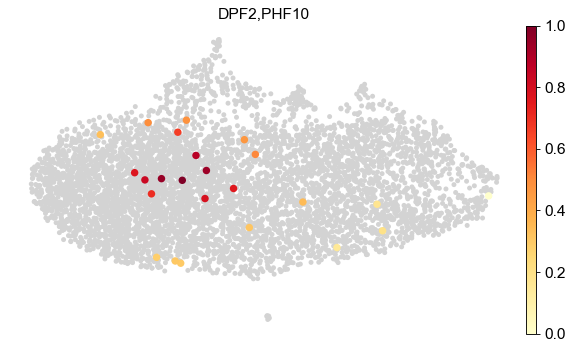

In [67]:
plot_embedding_one(adata,'DPF2')
plot_embedding_one(adata,'PHF10')
plot_embedding_one(adata,'DPF2,PHF10')

In [51]:
adata.obs['condition'].value_counts()

ARID1B                   595
NTC                      549
ARID2                    409
SS18                     396
DPF2                     347
ARID1A,ARID1B            262
BRD9                     245
GLTSCR1                  237
GLTSCR1L,GLTSCR1         175
ARID1A                   174
ARID2,BRD9               161
PBRM1                    159
SMARCA2,SMARCA4          156
SMARCC1,SMARCC2          150
SMARCE1                  141
GLTSCR1L                 136
SMARCC2                  136
SMARCA2                  128
SMARCB1                  113
SMARCD1                  111
ARID2,SMARCB1            109
SMARCA4                  108
ARID2,SMARCE1             99
SMARCD1,SMARCD2           87
SS18L                     83
ARID1A,ARID1B,BRD9        66
PHF10                     61
BCL7C                     60
SMARCC1                   57
BCL7A                     56
SMARCD2                   56
ARID1A,ARID1B,ARID2       47
BRD9,GLTSCR1L,GLTSCR1     45
BCL7B                     41
SS18L,SS18    

... storing 'complex_type' as categorical
... storing 'embedcBAF' as categorical
computing density on 'umap'
--> added
    'umap_density_embedcBAF', densities (adata.obs)
    'umap_density_embedcBAF_params', parameter (adata.uns)


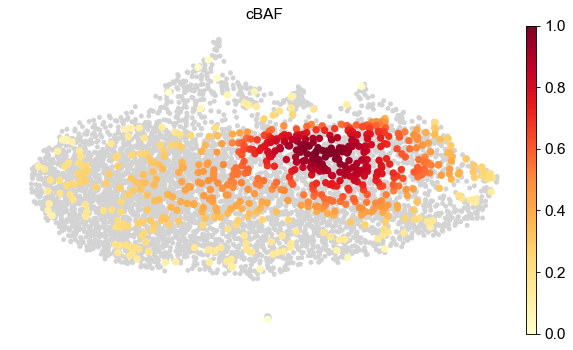

... storing 'embedncBAF' as categorical
computing density on 'umap'
--> added
    'umap_density_embedncBAF', densities (adata.obs)
    'umap_density_embedncBAF_params', parameter (adata.uns)


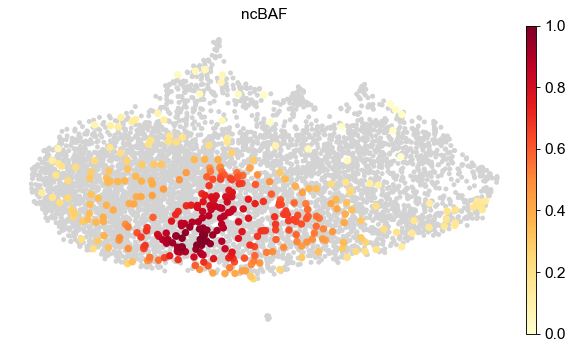

... storing 'embedPBAF' as categorical
computing density on 'umap'
--> added
    'umap_density_embedPBAF', densities (adata.obs)
    'umap_density_embedPBAF_params', parameter (adata.uns)


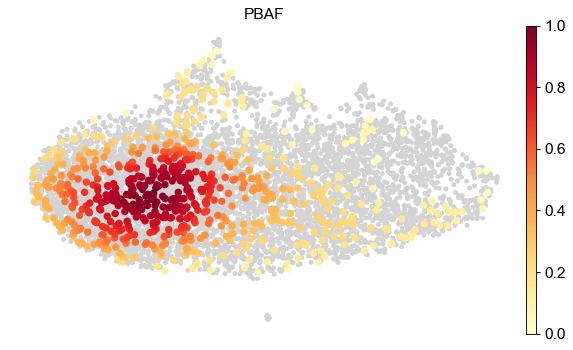

... storing 'embedcontrol' as categorical
computing density on 'umap'
--> added
    'umap_density_embedcontrol', densities (adata.obs)
    'umap_density_embedcontrol_params', parameter (adata.uns)


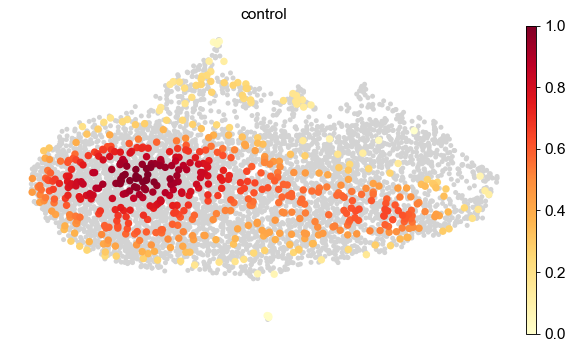

In [61]:
adata.obs['complex_type']='nothing'
adata.obs['complex_type'].loc[adata.obs['condition'].isin(['ARID1A','SMARCA4','SMARCB1',
                                                           'SMARCE1','SMARCC1','SMARCD2'])]='cBAF'
adata.obs['complex_type'].loc[adata.obs['condition'].isin(['BRD9','SMARCD1'])]='ncBAF'
adata.obs['complex_type'].loc[adata.obs['condition'].isin(['ARID2','PBRM1','BRD7','PHF10'])]='PBAF'
adata.obs['complex_type'].loc[adata.obs['condition'].isin(['NTC'])]='control'

def plot_embedding_one2(adata_here,gene):
    x=100
    adata_here.obs['embed'+gene]='not'
    adata_here.obs['embed'+gene].loc[adata_here.obs['complex_type']==gene]=gene
    sc.tl.embedding_density(adata_here, basis='umap', groupby='embed'+gene)
    sc.pl.embedding_density(
    adata_here, basis='umap', key='umap_density_embed'+gene, group=gene,
    #fg_dotsize=x,
    #bg_dotsize=x,
    save=gene+'.pdf',vmin=0,vmax=1,
        frameon=False,
        
)
    
plot_embedding_one2(adata,'cBAF')
plot_embedding_one2(adata,'ncBAF')
plot_embedding_one2(adata,'PBAF')
plot_embedding_one2(adata,'control')

In [5]:
gene='gene.ARID1A'
adata.obs['embed'+gene]='not'
adata.obs['embed'+gene].loc[adata.obs[gene]>0]=gene
sc.tl.embedding_density(adata, basis='umap', groupby='embed'+gene)

/Users/ursuo/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
... storing 'embedgene.ARID1A' as categorical
computing density on 'umap'
--> added
    'umap_density_embedgene.ARID1A', densities (adata.obs)
    'umap_density_embedgene.ARID1A_params', parameter (adata.uns)


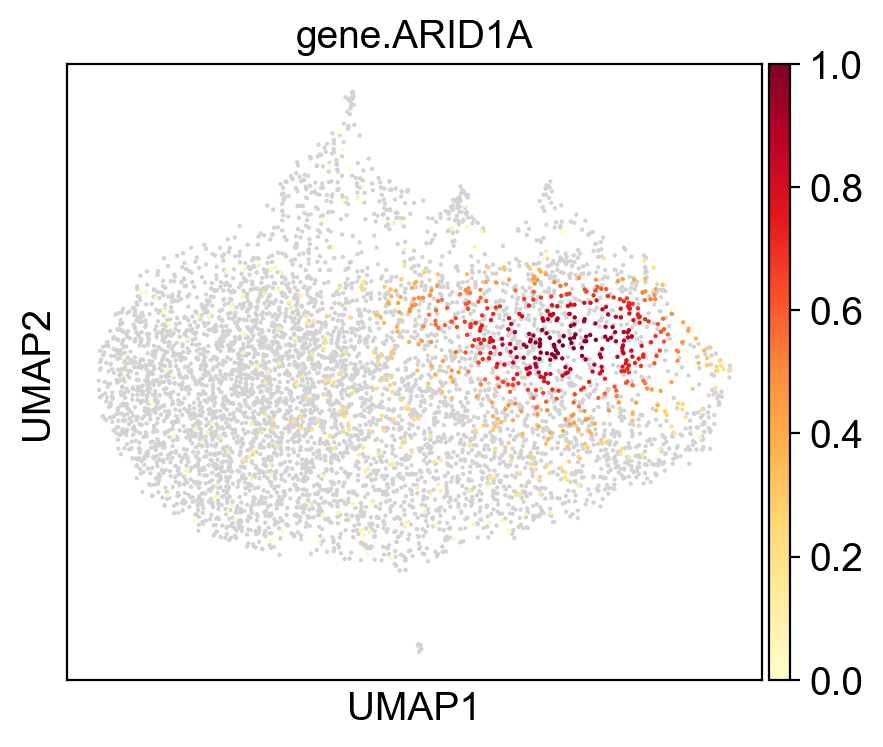

In [8]:
sc.pl.embedding_density(
    adata, basis='umap', key='umap_density_embed'+gene, group=gene,
    fg_dotsize=10,
    bg_dotsize=10,
    save=gene+'.pdf',
)

